In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [32]:
data=pd.read_csv('customer_churn_telecom_services.csv')

In [33]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [36]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [37]:
data.shape

(7043, 20)

In [38]:
missing_columns=data.columns[data.isnull().any()]
print(f"Missing columns are {missing_columns.tolist()}")

Missing columns are ['TotalCharges']


### Summary and Observations
No of Rows-7043<br>
No of columns-20<br>
Column having null values-TotalCharges<br>
Numerical Columns-4<br>
Target Variable-Churn<br>


## EDA

In [39]:
cat_cols=data.select_dtypes(include=['object']).columns.to_list()
print(cat_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [40]:
#No of unique values
unique_values_df=pd.DataFrame({'Column name':cat_cols,'No of Unique Values':[data[col].nunique() for col in cat_cols]})
print(unique_values_df)

         Column name  No of Unique Values
0             gender                    2
1            Partner                    2
2         Dependents                    2
3       PhoneService                    2
4      MultipleLines                    3
5    InternetService                    3
6     OnlineSecurity                    3
7       OnlineBackup                    3
8   DeviceProtection                    3
9        TechSupport                    3
10       StreamingTV                    3
11   StreamingMovies                    3
12          Contract                    3
13  PaperlessBilling                    2
14     PaymentMethod                    4
15             Churn                    2


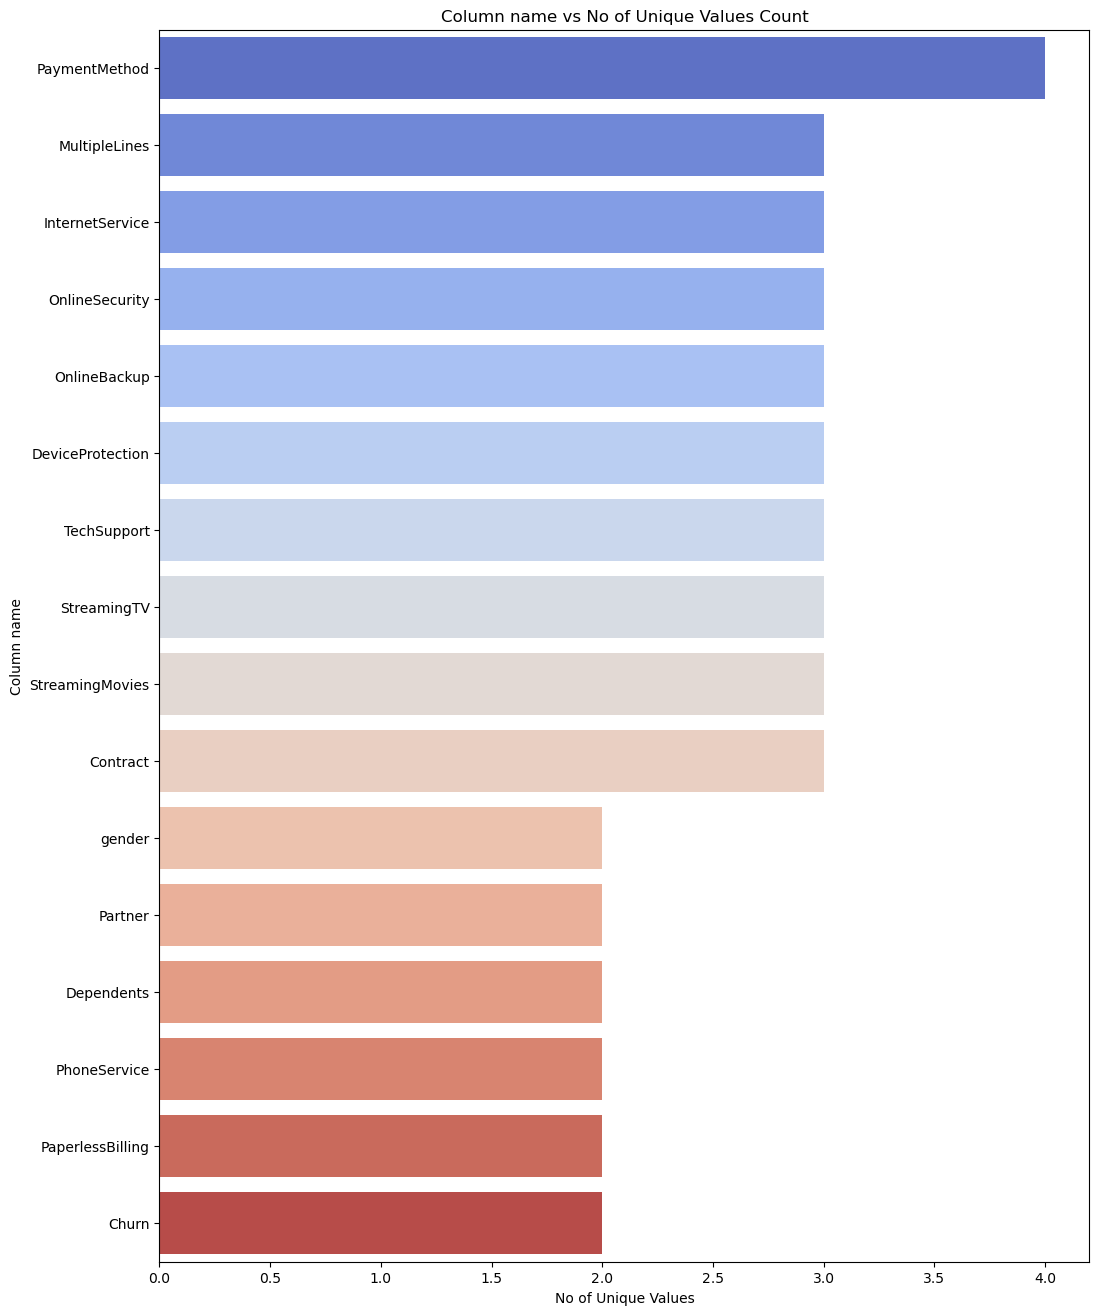

In [41]:
plt.figure(figsize=(12,16))
sns.barplot(x='No of Unique Values',y='Column name',data=unique_values_df.sort_values(by='No of Unique Values',ascending=False),palette='coolwarm')
plt.xlabel('No of Unique Values')
plt.ylabel('Column name')
plt.title('Column name vs No of Unique Values Count')
plt.show()

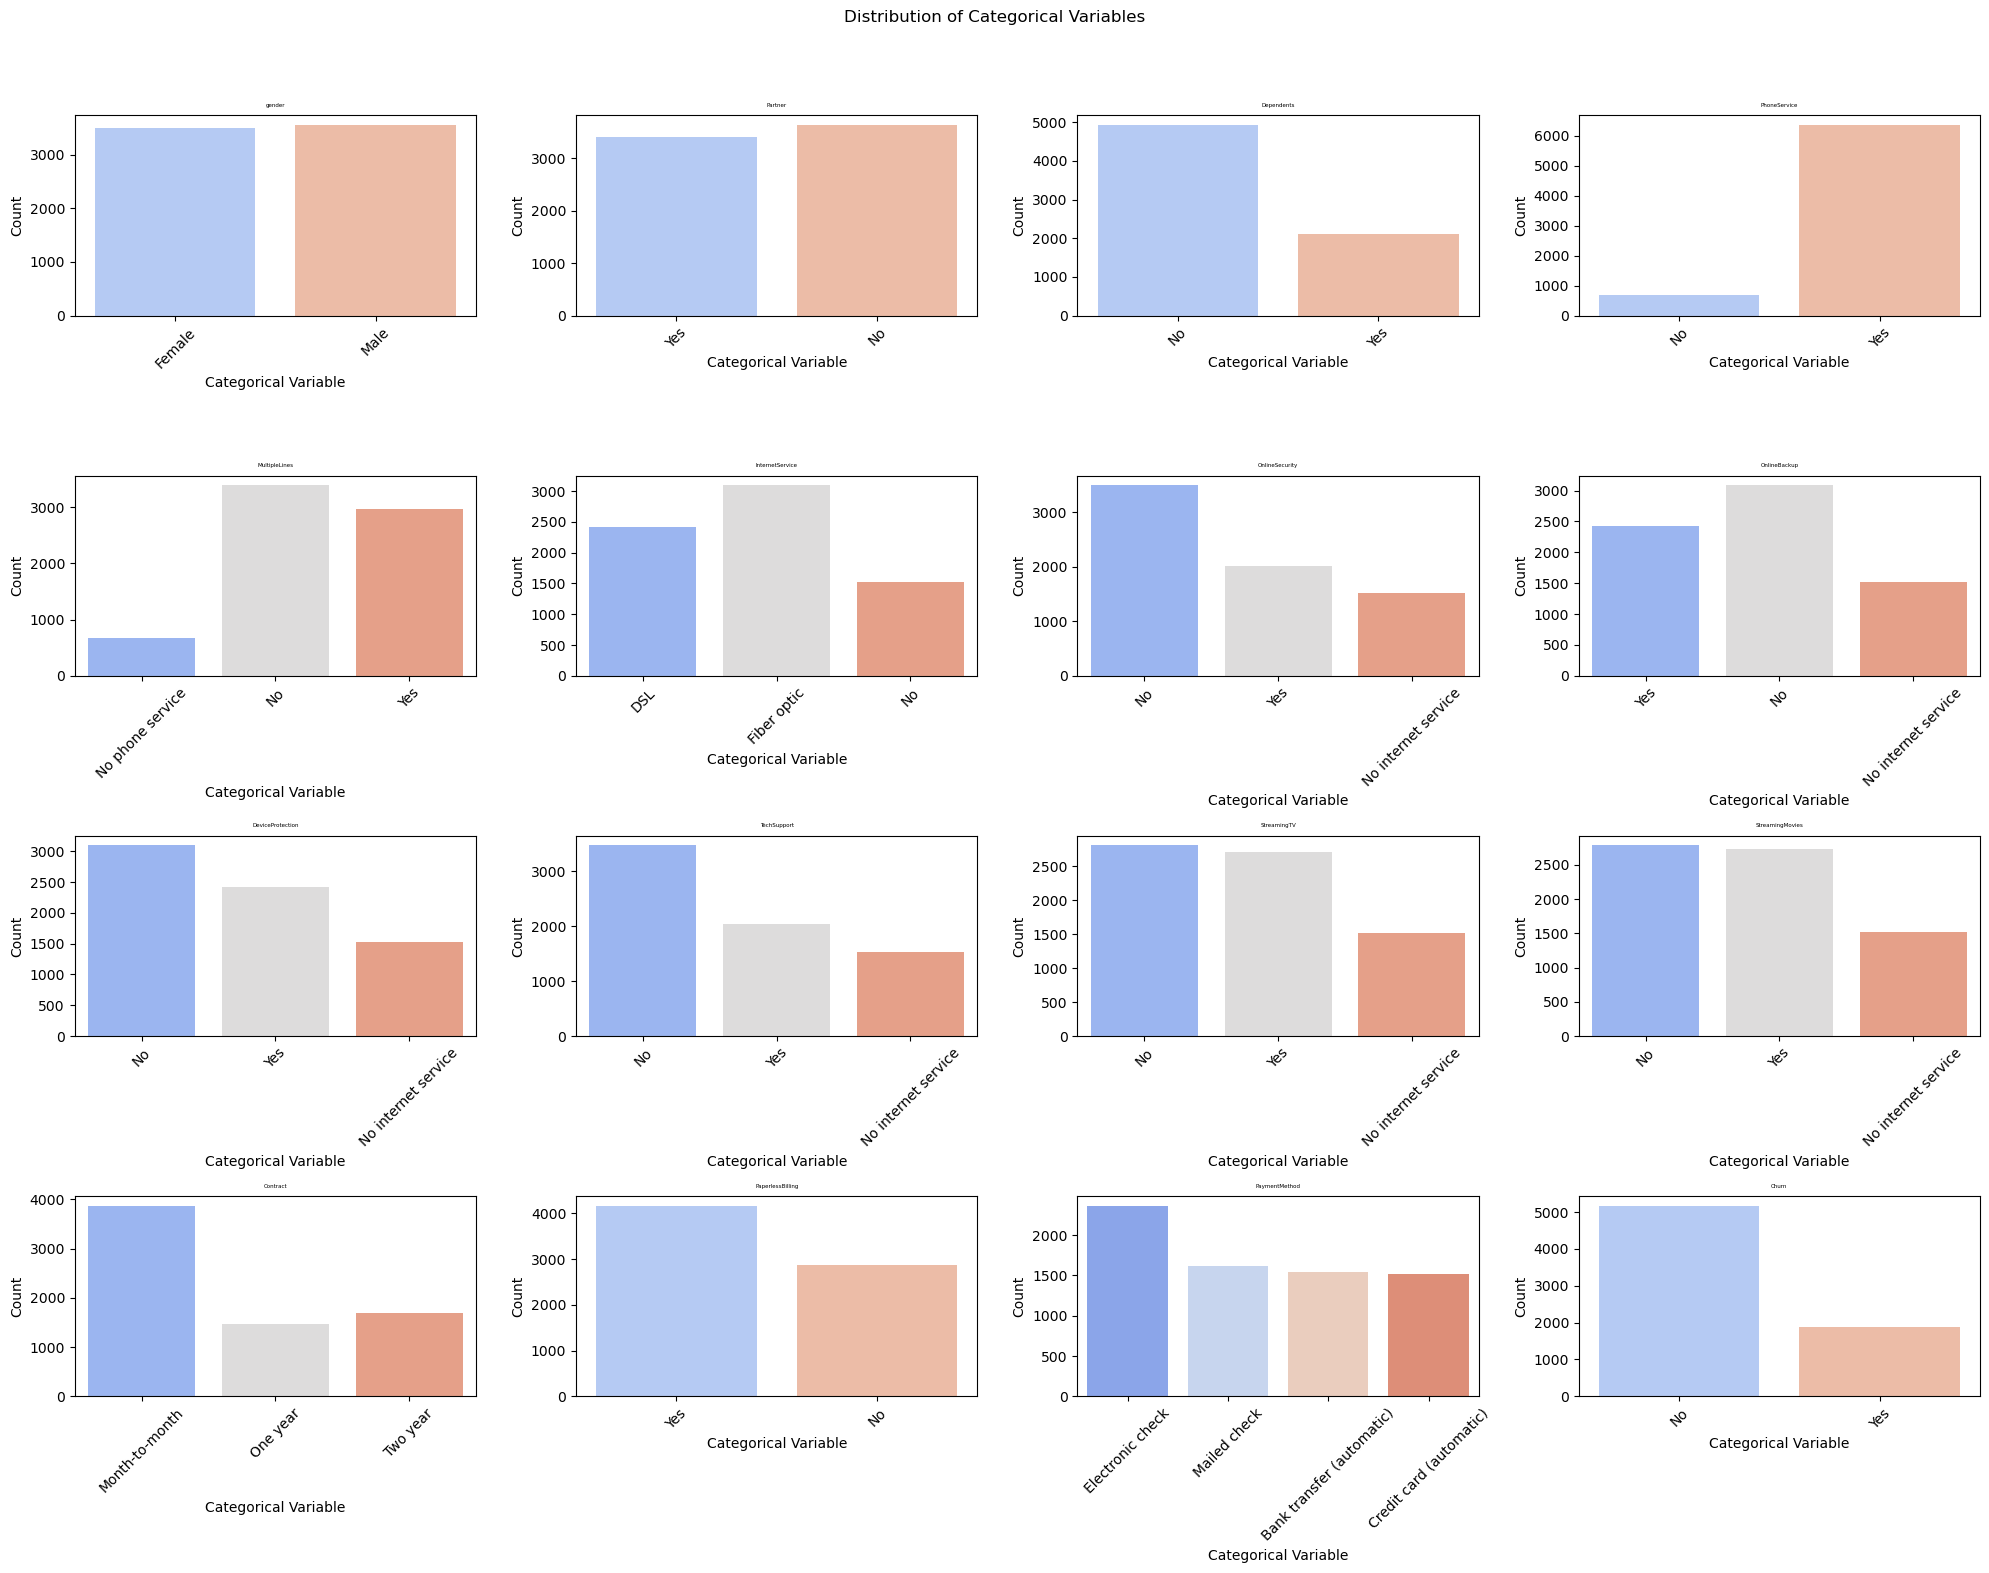

In [43]:
fig,axes=plt.subplots(4,4,figsize=(20,16))
fig.suptitle('Distribution of Categorical Variables')
axes=axes.flatten()
for i,col in enumerate(unique_values_df['Column name']):
    sns.countplot(x=data[col],ax=axes[i],palette='coolwarm')
    axes[i].set_title(col,fontsize=4)
    axes[i].set_xlabel("Categorical Variable")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x',rotation=45)
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()    
